# Visualizing Economic Data

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

(a) Read the data files from the current directory and (b) Interpret values

In [4]:
HEET = pd.read_table("HEET.tab")
Belgium = pd.read_table("COO_0.tab")
Canada = pd.read_table("COO_2700.tab")
France = pd.read_table("COO_2762.tab")
Sweden = pd.read_table("COO_3026.tab")

(c) Linearly interpolate the Growth as a function of Timestamp to find values at the same timestamp from which DiscountRate is available

In [5]:
# Model Implementation
x = HEET['Timestamp']
y = HEET['Growth']
f1 = interp1d(x, y)

In [6]:
# Apply the model trained by linear interpolation to each country
Belgium["Belgium Growth 1"] = f1(Belgium['Timestamp'])
Canada["Canada Growth 1"] = f1(Canada['Timestamp'])
France["France Growth 1"] = f1(France['Timestamp'])
Sweden["Sweden Growth 1"] = f1(Sweden['Timestamp'])

(Extra Credit)
* Linearly interpolate the Growth as a function of GDP to find values at the same timestamp from which DiscountRate is available (except for Belgium)

In [7]:
# Model Implementation
x = HEET['GDP']
y = HEET['Growth']
f2 = interp1d(x, y, fill_value="extrapolate")

# Apply the model trained by linear interpolation to countries: Canada, France and Sweden
Canada["Canada Growth 2"] = f2(Canada['GDP'])
France["France Growth 2"] = f2(France['GDP'])
Sweden["Sweden Growth 2"] = f2(Sweden['GDP'])

(d) Make two plots appear as subplots of a single figure: <br>
* plot 1: Growth as a function of DiscountRate (linear interpolate as a function of Timestamp) <br>
* plot 2: Growth as a function of DiscountRate (linear interpolate as a function of GDP) <br>

(-10, 5)

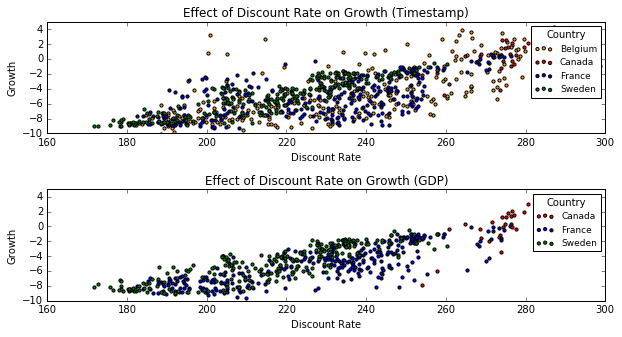

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 5), dpi = 60)
f.subplots_adjust(hspace=0.5)

A = ax1.scatter(Belgium["DiscountRate"], Belgium["Belgium Growth 1"], s=10, c='orange')
B = ax1.scatter(Canada["DiscountRate"], Canada["Canada Growth 1"], s=10, c='r')
C = ax1.scatter(France["DiscountRate"], France["France Growth 1"], s=10, c='b')
D = ax1.scatter(Sweden["DiscountRate"], Sweden["Sweden Growth 1"], s=10, c='g')
ax1.set_title("Effect of Discount Rate on Growth (Timestamp)")
ax1.set_xlabel("Discount Rate")
ax1.set_ylabel("Growth")
ax1.legend((A,B,C,D),("Belgium", "Canada", "France", "Sweden"),title='Country',fontsize=9,loc=0)
ax1.set_xlim((160, 300))
ax1.set_ylim((-10, 5))

E = ax2.scatter(Canada["DiscountRate"], Canada["Canada Growth 2"], s=10, c='r')
F = ax2.scatter(France["DiscountRate"], France["France Growth 2"], s=10, c='b')
G = ax2.scatter(Sweden["DiscountRate"], Sweden["Sweden Growth 2"], s=10, c='g')
ax2.set_title("Effect of Discount Rate on Growth (GDP)")
ax2.set_xlabel("Discount Rate")
ax2.set_ylabel("Growth")
ax2.legend((E,F,G),("Canada", "France", "Sweden"),title='Country',fontsize=9,loc=0)
ax2.set_xlim((160, 300))
ax2.set_ylim((-10, 5))